In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# K-means clustering for image quantisation
 -  K corresponds to the number of colours

In [2]:
#Function to calculate output for correspoding value of K
def k_quantize(K):      
    ret, label, center = cv2.kmeans(Z, K, None,
                                  criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    output = res.reshape((img.shape))
    return output

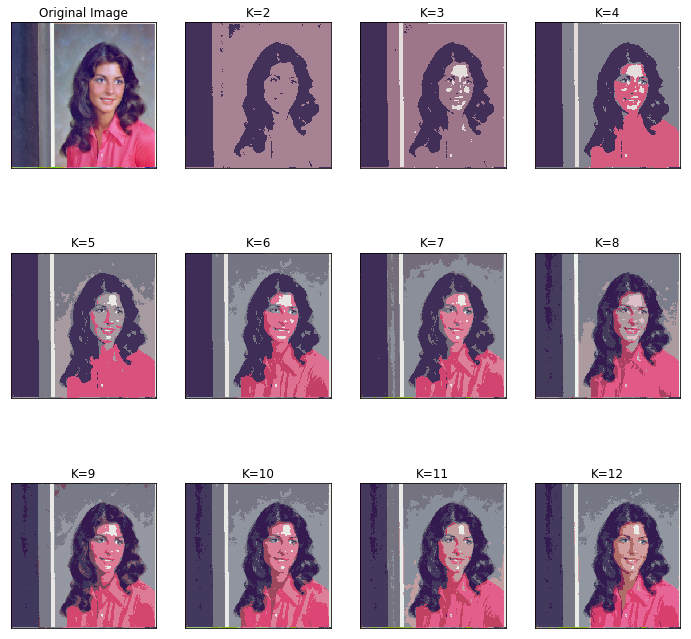

In [3]:

path = 'misc/'
imgpath1 = path + '4.1.04.png'
img = cv2.imread(imgpath1, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Z = img.reshape((-1,3))
Z = np.float32(Z)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

output1 = k_quantize(2)
output2 = k_quantize(3)
output3 = k_quantize(4)
output4 = k_quantize(5)
output5 = k_quantize(6)
output6 = k_quantize(7)
output7 = k_quantize(8)
output8 = k_quantize(9)
output9 = k_quantize(10)
output10 = k_quantize(11)
output11 = k_quantize(12)

outputs = [img, output1, output2, output3, output4, output5, output6, output7, output8, output9, output10, output11]


titles = ['Original Image']
for i in range(2, 13): 
    titles.append(("K=" + str(i)))
plt.figure(figsize=(12, 12))


for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(outputs[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

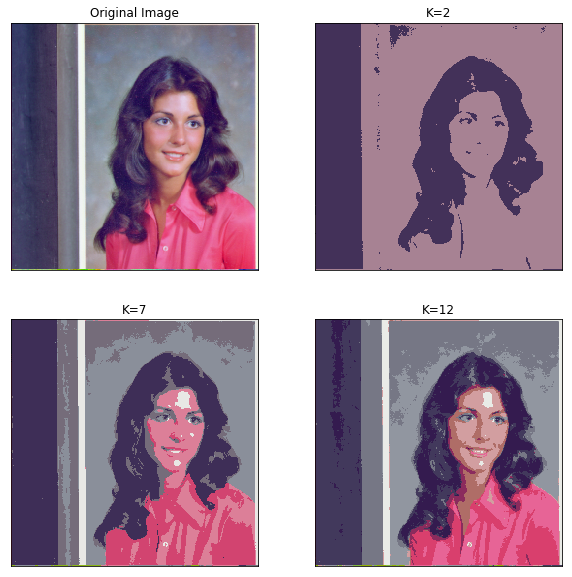

In [4]:
#For comparison of outputs
output = [img, output1, output6, output11]
titles = ['Original Image', 'K=2', 'K=7', 'K=12']
plt.figure(figsize=(10, 10))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(output[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## So, we can represent an image with fewer colors, this loss also helps to reduce the size of the image significantly as shown below.

In [5]:
import os
print("Size of original image: " + str(os.stat('misc/4.1.04.png').st_size) + " bytes")

Size of original image: 196748 bytes


In [6]:
from PIL import Image
for i, output in enumerate(outputs[1:]):
    im = Image.fromarray(output)
    im.save("your_file.png")
    print("For K = {} image size is:  ".format(i+2) + str(os.stat('your_file.png').st_size) + " bytes")

For K = 2 image size is:  3045 bytes
For K = 3 image size is:  3441 bytes
For K = 4 image size is:  4060 bytes
For K = 5 image size is:  5852 bytes
For K = 6 image size is:  7222 bytes
For K = 7 image size is:  7491 bytes
For K = 8 image size is:  9674 bytes
For K = 9 image size is:  11425 bytes
For K = 10 image size is:  10481 bytes
For K = 11 image size is:  11234 bytes
For K = 12 image size is:  11154 bytes


## Size is reduced from 196.7KB to 12.5KB! Though there is a visible loss of information. 